In [11]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import xarray as xr

# Download points

In [50]:
byrd_bedmap_points = pd.read_csv('/home/kim/ice_thickness/data/byrd_200km.csv')

In [51]:
byrd_bedmap_points["t"].describe()

count    465760.000000
mean       1583.798401
std         567.502192
min           0.000000
25%        1235.620000
50%        1627.690000
75%        1960.980000
max        3620.100000
Name: t, dtype: float64

In [42]:
byrd_bedmap_points["source"].value_counts()

NASA_2011_ICEBRIDGE_AIR_BM2.csv    315520
UTIG_2010_ICECAP_AIR_BM3.csv        97702
NASA_2017_ICEBRIDGE_AIR_BM3.csv     27877
NASA_2013_ICEBRIDGE_AIR_BM3.csv     15628
BAS_2007_AGAP_AIR_BM2.csv            8208
LDEO_2015_ROSETTA_AIR_BM3.csv         631
BEDMAP1_1966-2000_AIR_BM1.csv         193
UTIG_2004_AGASEA_AIR_BM2.csv            1
Name: source, dtype: int64

# Download map

In [90]:
path_to_file_server = 'data/byrd_bedmachine.nc'
byrd_bedmachine = xr.open_dataset(path_to_file_server)

### Corrections

Bed, thickness, and surface elevation need to be corrected to ellipsoid. 
Ice thickness also needs to be firn corrected.

In [94]:
byrd_bedmachine["bed_ellipsoid"] = byrd_bedmachine["bed"] + byrd_bedmachine["geoid"]
byrd_bedmachine["thickness_ellipsoid"] = byrd_bedmachine["thickness"] + byrd_bedmachine["geoid"]
byrd_bedmachine["thickness_ellipsoid_true"] = byrd_bedmachine["thickness_ellipsoid"] + byrd_bedmachine["firn"]

## Define bed topography map from Bedmachine

In [12]:
cvals  = [-2000, -1500, -1000, -500, -1,
           0, 
          1, 250, 500, 750, 1000]

colors = ["#001079", "#0023c1", "#006cef", "#47bdfc", "#bee6fa", 
          "#7eb3a1",
          "#2D6E2A", "#DFFBBC", "#AFAD48", "#7D5F18", "#481B02"]

# Create a colormap object
norm = plt.Normalize(np.min(cvals), np.max(cvals))
tuples = list(zip(map(norm, cvals), colors))

bedmachine_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", tuples)

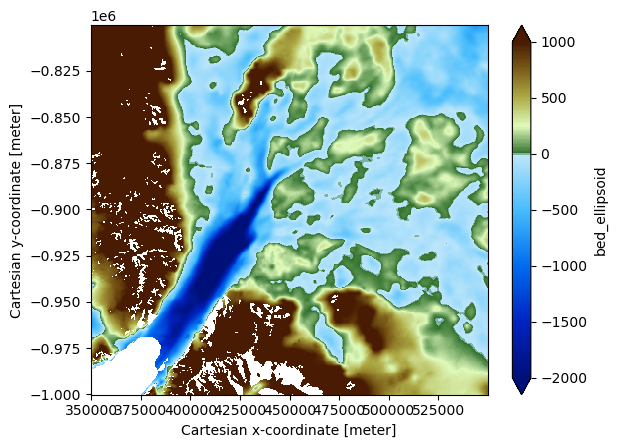

In [92]:
byrd_bedmachine.bed_ellipsoid.plot(cmap = bedmachine_cmap, vmin = -2000, vmax = 1000)

# Overlay with data points

- If we see stripes in this the interpolation is inconsistent with the data
- However here we are showing Bedmachine grid and Bedmap measurements

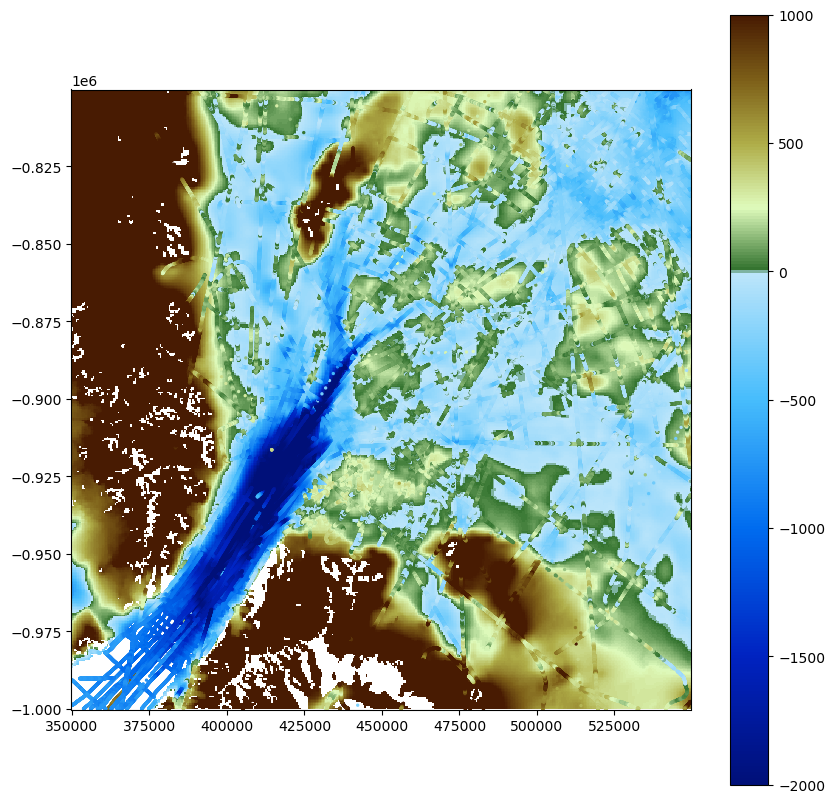

In [93]:
XX, YY = np.meshgrid(byrd_bedmachine.x, byrd_bedmachine.y)

fig, ax = plt.subplots(figsize = (10, 10))

# Plot bed topography mesh
ax.pcolormesh(XX, YY, byrd_bedmachine.bed_ellipsoid, cmap = bedmachine_cmap, vmin = -2000, vmax = 1000)

# Plot data points
ax.scatter(byrd_bedmap_points["x"], byrd_bedmap_points["y"], 
           c = byrd_bedmap_points["b"], 
           s = 2,
           cmap = bedmachine_cmap, vmin = -2000, vmax = 1000)

fig.colorbar(mappable = ax.collections[0], ax = ax)
ax.set_aspect('equal')

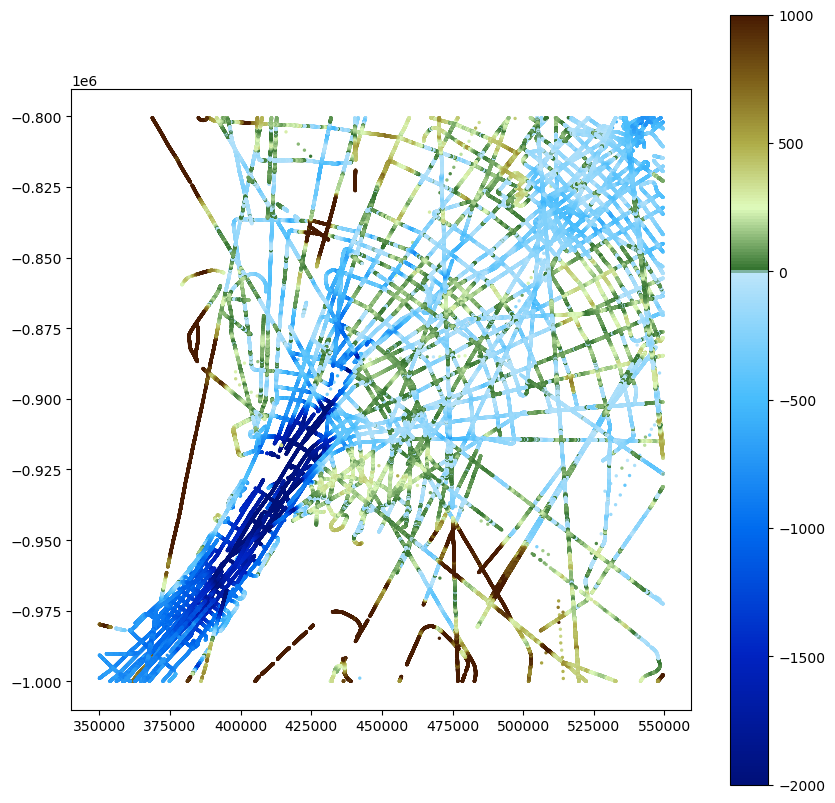

In [27]:
XX, YY = np.meshgrid(byrd_bedmachine.x, byrd_bedmachine.y)

fig, ax = plt.subplots(figsize = (10, 10))

# Plot bed topography mesh
# ax.pcolormesh(XX, YY, byrd_bedmachine.bed, cmap = bedmachine_cmap, vmin = -2000, vmax = 1000)

# Plot data points
# defaukt size is 20
ax.scatter(byrd_bedmap_points["x"], byrd_bedmap_points["y"], c = byrd_bedmap_points["b"], s = 2, cmap = bedmachine_cmap, vmin = -2000, vmax = 1000)

fig.colorbar(mappable = ax.collections[0], ax = ax)
ax.set_aspect('equal')

# White overlay just to show where we have data

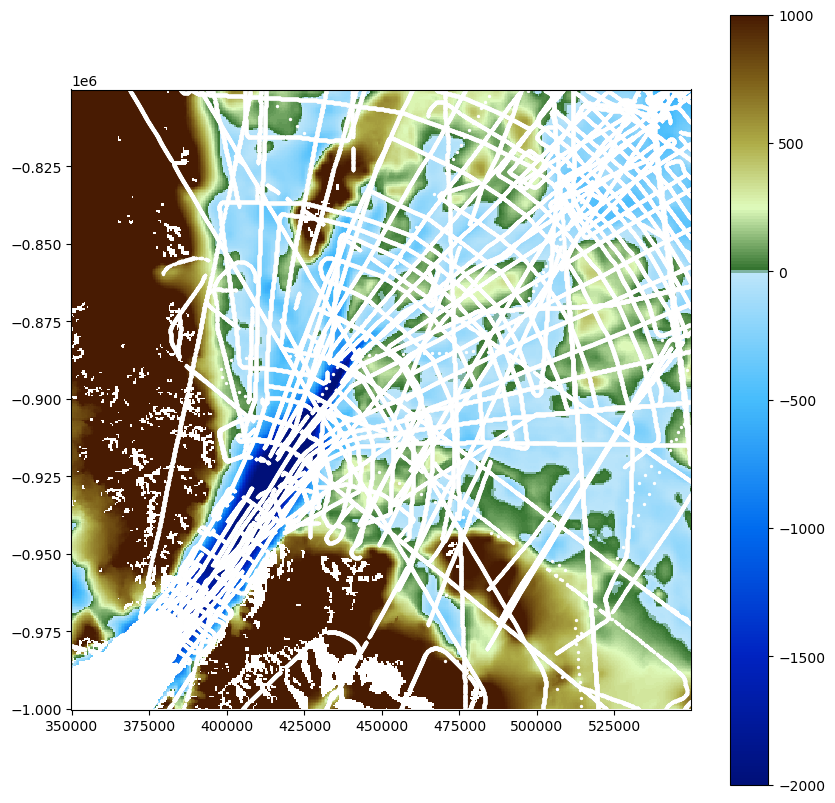

In [95]:
XX, YY = np.meshgrid(byrd_bedmachine.x, byrd_bedmachine.y)

fig, ax = plt.subplots(figsize = (10, 10))

# Plot bed topography mesh
ax.pcolormesh(XX, YY, byrd_bedmachine.bed_ellipsoid, cmap = bedmachine_cmap, vmin = -2000, vmax = 1000)

# Plot data points
ax.scatter(byrd_bedmap_points["x"], byrd_bedmap_points["y"], 
           c = "white",
           s = 2)

fig.colorbar(mappable = ax.collections[0], ax = ax)
ax.set_aspect('equal')

# Repeat for ice thickness

In [28]:
cvals  = [0, 
          1, 250, 500, 750, 1000]

colors = ["#7eb3a1",
          "#bee6fa", "#47bdfc", "#006cef", "#0023c1", "#001079"]

# Create a colormap object
norm = plt.Normalize(np.min(cvals), np.max(cvals))
tuples = list(zip(map(norm, cvals), colors))

icethickness_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", tuples)

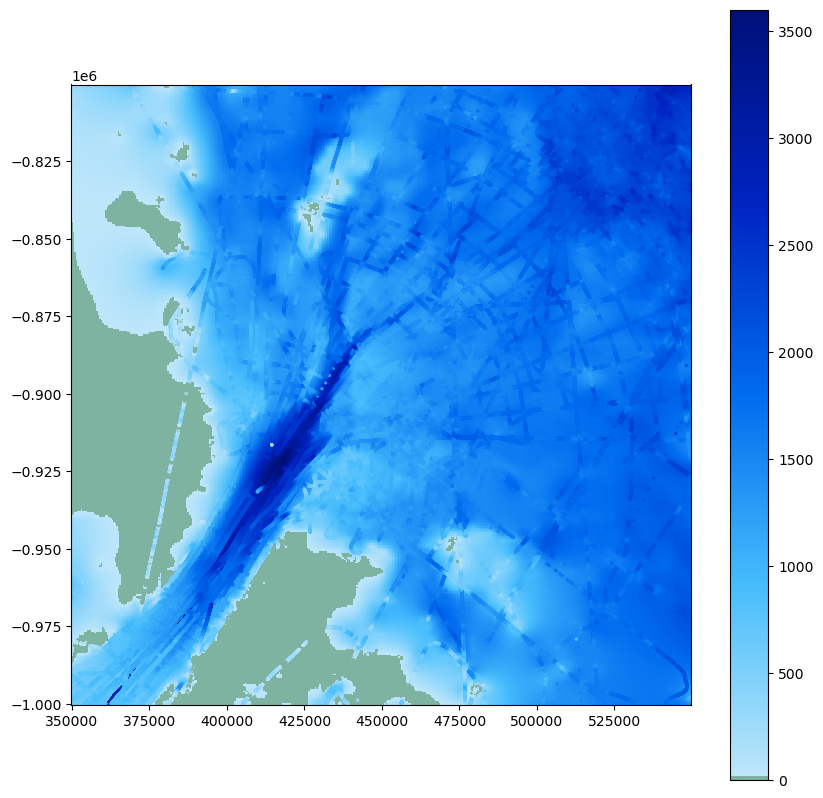

In [96]:
XX, YY = np.meshgrid(byrd_bedmachine.x, byrd_bedmachine.y)

fig, ax = plt.subplots(figsize = (10, 10))

# Plot bed topography mesh
ax.pcolormesh(XX, YY, byrd_bedmachine.thickness_ellipsoid_true, cmap = icethickness_cmap, vmin = 0, vmax = 3600)

# Plot data points
ax.scatter(byrd_bedmap_points["x"], byrd_bedmap_points["y"], 
           c = byrd_bedmap_points["t"], 
           s = 2,
           cmap = icethickness_cmap, vmin = 0, vmax = 3620)

fig.colorbar(mappable = ax.collections[0], ax = ax)
ax.set_aspect('equal')

# Subset smaller area to see pixels

In [67]:
# Edge of ice stream
x_min = 375000 + 500
x_max = 400000

y_min = -900000 + 500
y_max = -975000

In [81]:
# Island (interesting)
x_min = 420000 + 500
x_max = 445000

y_min = -850000 + 500
y_max = -825000

In [98]:
# Narrow stream
x_min = 420000 + 500
x_max = 445000

y_min = -900000 + 500
y_max = -875000

In [99]:
byrd_bedmap_points_zoom = byrd_bedmap_points[
    (byrd_bedmap_points["x"] > x_min) & 
    (byrd_bedmap_points["x"] < x_max) & 
    (byrd_bedmap_points["y"] > y_min) & 
    (byrd_bedmap_points["y"] < y_max)]

byrd_bedmap_points_zoom

,Unnamed: 0,lon,lat,x,y,s,t,b,b_inferred,source
67,67,153.523000,-80.910000,441221.317948,-885843.398034,1165.00,1003.00,162.00,False,BEDMAP1_1966-2000_AIR_BM1.csv
68,68,153.402600,-80.897800,443678.914546,-886106.750572,1191.00,905.00,286.00,False,BEDMAP1_1966-2000_AIR_BM1.csv
134,134,153.177400,-80.978390,443183.389487,-876494.750747,1332.00,1033.00,299.00,False,BEDMAP1_1966-2000_AIR_BM1.csv
135,135,153.304700,-80.964800,441902.216172,-878804.339821,1288.00,954.00,334.00,False,BEDMAP1_1966-2000_AIR_BM1.csv
136,136,153.790200,-80.915800,436805.373245,-887322.585003,1126.00,1627.00,-501.00,False,BEDMAP1_1966-2000_AIR_BM1.csv
...,...,...,...,...,...,...,...,...,...,...
443697,443697,153.687119,-80.881028,440085.944673,-889942.488152,992.18,1104.19,-112.01,False,UTIG_2010_ICECAP_AIR_BM3.csv
443698,443698,153.687639,-80.881209,440069.097306,-889928.746111,922.28,1083.80,-161.52,False,UTIG_2010_ICECAP_AIR_BM3.csv
443699,443699,153.688180,-80.881397,440051.584873,-889914.479200,990.69,1130.84,-140.15,False,UTIG_2010_ICECAP_AIR_BM3.csv
443700,443700,153.688699,-80.881578,440034.753625,-889900.729014,961.16,1104.61,-143.45,False,UTIG_2010_ICECAP_AIR_BM3.csv


In [100]:
byrd_bedmachine_zoom = byrd_bedmachine.sel(y = slice(y_max, y_min),
                                        x = slice(x_min, x_max))

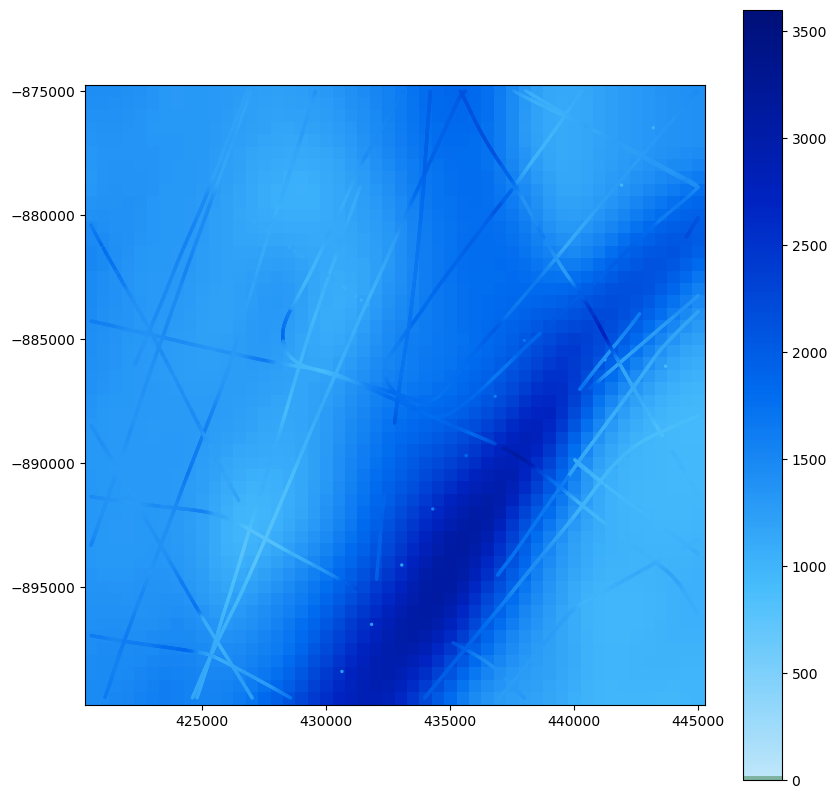

In [102]:
XX, YY = np.meshgrid(byrd_bedmachine_zoom.x, byrd_bedmachine_zoom.y)

fig, ax = plt.subplots(figsize = (10, 10))

# Plot bed topography mesh
ax.pcolormesh(XX, YY, byrd_bedmachine_zoom.thickness, cmap = icethickness_cmap, vmin = 0, vmax = 3600)

# Plot data points
ax.scatter(byrd_bedmap_points_zoom["x"], byrd_bedmap_points_zoom["y"], 
           c = byrd_bedmap_points_zoom["t"], 
           s = 2,
           cmap = icethickness_cmap, vmin = 0, vmax = 3620)

fig.colorbar(mappable = ax.collections[0], ax = ax)
ax.set_aspect('equal')

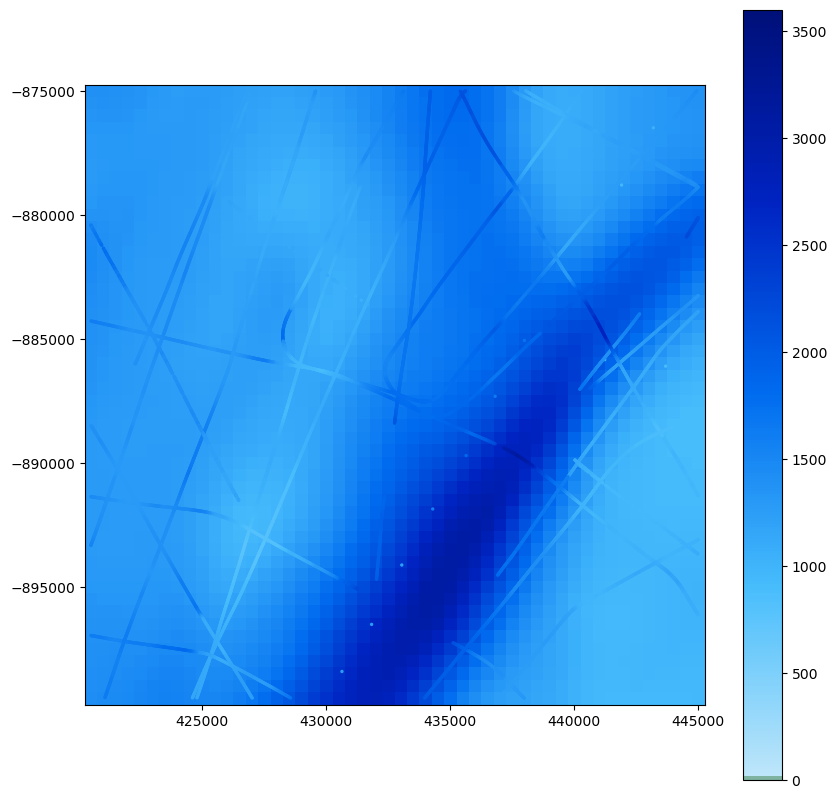

In [101]:
XX, YY = np.meshgrid(byrd_bedmachine_zoom.x, byrd_bedmachine_zoom.y)

fig, ax = plt.subplots(figsize = (10, 10))

# Plot bed topography mesh
ax.pcolormesh(XX, YY, byrd_bedmachine_zoom.thickness_ellipsoid_true, cmap = icethickness_cmap, vmin = 0, vmax = 3600)

# Plot data points
ax.scatter(byrd_bedmap_points_zoom["x"], byrd_bedmap_points_zoom["y"], 
           c = byrd_bedmap_points_zoom["t"], 
           s = 2,
           cmap = icethickness_cmap, vmin = 0, vmax = 3620)

fig.colorbar(mappable = ax.collections[0], ax = ax)
ax.set_aspect('equal')

# Check difference of correction

In [103]:
byrd_bedmachine_zoom.thickness_ellipsoid_true

<xarray.DataArray 'thickness_ellipsoid_true' (y: 50, x: 50)>
array([[1398.1183 , 1399.6023 , 1388.9546 , ..., 1342.0808 , 1359.4343 ,
        1374.3337 ],
       [1374.4987 , 1379.3741 , 1372.4358 , ..., 1335.1901 , 1353.4846 ,
        1367.7535 ],
       [1348.1189 , 1356.2356 , 1352.6478 , ..., 1330.5946 , 1347.5516 ,
        1360.5369 ],
       ...,
       [1412.5775 , 1423.0886 , 1431.967  , ...,  962.6774 ,  955.9681 ,
         954.6067 ],
       [1416.1853 , 1431.6295 , 1444.5359 , ...,  945.614  ,  947.1858 ,
         949.4019 ],
       [1423.7843 , 1439.6335 , 1457.6809 , ...,  930.5833 ,  939.47723,
         947.8429 ]], dtype=float32)
Coordinates:
  * x        (x) int32 420500 421000 421500 422000 ... 444000 444500 445000
  * y        (y) int32 -875000 -875500 -876000 ... -898500 -899000 -899500

In [104]:
byrd_bedmachine_zoom.thickness

<xarray.DataArray 'thickness' (y: 50, x: 50)>
array([[1431.3368 , 1432.8652 , 1422.262  , ..., 1377.3508 , 1394.7279 ,
        1409.6509 ],
       [1407.7084 , 1412.6327 , 1405.7432 , ..., 1370.5005 , 1388.8186 ,
        1403.1111 ],
       [1381.3198 , 1389.4897 , 1385.9551 , ..., 1365.9454 , 1382.926  ,
        1395.9349 ],
       ...,
       [1447.0626 , 1457.6426 , 1466.5898 , ...,  999.83685,  993.15247,
         991.81604],
       [1450.7096 , 1466.2213 , 1479.1951 , ...,  982.81396,  984.4094 ,
         986.6493 ],
       [1458.3478 , 1474.2631 , 1492.3765 , ...,  967.8237 ,  976.7401 ,
         985.1283 ]], dtype=float32)
Coordinates:
  * x        (x) int32 420500 421000 421500 422000 ... 444000 444500 445000
  * y        (y) int32 -875000 -875500 -876000 ... -898500 -899000 -899500
Attributes:
    long_name:      ice thickness
    standard_name:  land_ice_thickness
    units:          meters
    grid_mapping:   mapping
    source:         Mathieu Morlighem

Observation: Single value clearly looks like an error